<u><h2>The data files</h2></u>
<ul>
  <li>The data are presented as header-less (numeric data only without any descriptive text) in ASCII format.</li>
  <li>The file has two columns of integer values, separated by a space.</li>
  <li>The links for the data are given below. Pick any one to work on initially.</li>
  <ul>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maSG5XTndHbXVHTWM/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 1</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maQm90Y2NHcHRUNlU/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 2</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maU2JUY18yWFM2SU0/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 3</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maVURwRk5BaUZJYmM/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 4</a></li>
  <li><a href="https://drive.google.com/file/d/0B71z6CTGT4maQzc5RnJjd1FzNzQ/view?usp=sharing_eil&ts=58a78222" target="_blank">Data file 5</a></li>
  </ul>
</ul>


<u><h3>Description of the data:</h3></u>
<ul>
  <li>Voltage time series from the Ooty Radio Telescope (ORT) &mdash; North and South apertures</li>
  <li>As raw voltages, the data are in arbitrary units</li>
  <li>The observation frequency is $326.5\pm8.25$ MHz which has been down-converted to the base band. The voltages hence occupy the $0-16.5$ MHz band.</li>
  <li>The data is sampled at the Nyquist rate, i.e., two real valued voltage measurements in a period corresponding to the maximum variability time-scale (maximum frequency). The time-resolution is, $$dt = \left(\frac{1}{2}\frac{1}{16.5 \text{MHz}}\right)\text{seconds}$$ </li>
  <li>The length of the data is about 1 second</li>
</ul>


We encourage you to explore the data on you own but here are a few ideas to guide you:
<u><h3>A few goals to get you started with this activity</h3></u>
<ul>
  <li>Visulaize the voltage time-series</li>
  <li>Plot and characterize the distribution of the telescope voltage data</li>
  <li>Visulaize the power time-series</li>
  <li>Plot and characterize the distribution fo the power values</li>
  <li>Power Spectral Density: obtain the distribution of power in various frequency bins</li>
  <li>Dynamic spectrum: visualize the change in power spectral density as a function of time</li>
</ul>

<h3>Preliminaries</h3>
<p>This notebook assumes that the code is being executed on Google Colab using a hosted runtime. You are free to use a local editor and runtime or a different programming language altogether as you see fit.</p>
<ul>
  <li>Import necessary libraries</li>
  <li>Access and load the data file</li>
</ul>

<h4>Import libraries</h4>

In [1]:
# General libraries for easy data manipulation
import os  
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Scientific computing libraries
'''
import scipy.constants as scp
import astropy.constants as asc
# Plotting libraries and methods
'''
#<< Import more libraries as needed >>

'\nimport scipy.constants as scp\nimport astropy.constants as asc\n# Plotting libraries and methods\n'

<h4>Access data from Google drive and load to notebook</h4>
<p>The code in the cell below allows you to access a file saved in the Google drive. You need to simply do two things to make it work:</p>
1. Enter the 'file_id'. This is an alpha-numeric string obtained from the sharing link of the data file. If the sharing link looks something like: https://drive.google.com/file/d/0B71z6CTGT4maU2JUY18yWFM2SU0/view?usp=sharing, file_id is the part between "d/" and "/view".</br>
2. Run the cell, click on the authentication link generated by the cell, sign-in with your Gmail account, copy the code generated in the next page, and enter it in the field provided below the cell to allow file access


In [2]:
'''
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '0B71z6CTGT4maU2JUY18yWFM2SU0'
downloaded = drive.CreateFile({'id': file_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))
print('title: %s, mimeType: %s' % (downloaded['title'], downloaded['mimeType']))
'''

'\n# Import PyDrive and associated libraries.\n# This only needs to be done once per notebook.\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n\n# Authenticate and create the PyDrive client.\n# This only needs to be done once per notebook.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n\n# Download a file based on its file ID.\n#\n# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz\nfile_id = \'0B71z6CTGT4maU2JUY18yWFM2SU0\'\ndownloaded = drive.CreateFile({\'id\': file_id})\n# print(\'Downloaded content "{}"\'.format(downloaded.GetContentString()))\nprint(\'title: %s, mimeType: %s\' % (downloaded[\'title\'], downloaded[\'mimeType\']))\n'

In [ ]:
'''
# The file title needed to download the file is printed above
# The following command loads the file and makes the title available for use in the program
downloaded.GetContentFile('ch00_B0833-45_20150612_191438_010_3')
# The file can be accessed now using its title as you would access a locally saved file
'''

In [2]:
# One can use the read_csv method in Pandas to create a dataframe with the raw voltages data, as shown below
volts = pd.read_csv('ch00_B0833-45_20150612_191438_010_3', delim_whitespace=True, header=None)
volts.columns = ['AN', 'AS']  # Choose titles for the two columns for data from Antenna North and Antenna South, named 'AN' and 'AS" here
# Print the first few entries of the data frame and ensure the data matches the file E.g.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
volts
volts.head(10)

AN  AS
0 -65  -5
1 -37  17
2  49   0
3 -30 -22
4  62   4
5 -16  34
6 -27  44
7  30  32
8  -1 -33
9 -12  18

<h3>Section 1: The voltage time series</h3>

<h4>1.1: Plot the voltages from North and South antennas as a function of time</h4>

<ul>
  <li>A simple matplotlib <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">line</a> plot may be sufficient to visualize the time-series.</li>
  <li>Use libraries such as Seaborn or Bokeh for aesthetics</li>
  <li>Plot a small part of the time series too to zoom in on the variability time-scale</li>
</ul>

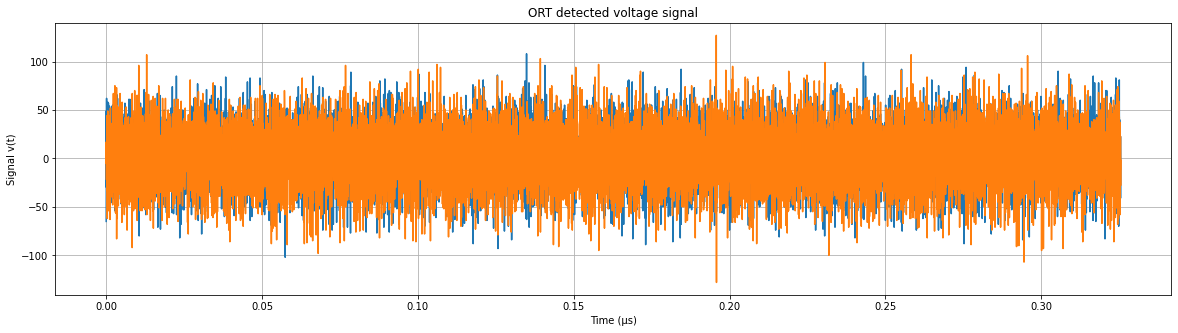

In [3]:
# Plotting code for voltage time-series
t = np.linspace(0, 1, len(volts))*1000
plt.figure(figsize=(20, 5))
plt.plot(t[:10000], volts['AN'].head(10000), t[:10000], volts['AS'].head(10000))
plt.title("ORT detected voltage signal")
plt.xlabel("Time (\u03BCs)")
plt.ylabel("Signal v(t)")
plt.grid(True)
plt.show()

<h4>1.2: Plot the voltage histograms for the two antennas</h4> 
<ul>
  <li>Use matplotlib <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist</a> for plotting histograms (<a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_target">Example</a>)</li>
  <li>Obtain distribution parameters using numpy methods for <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" target="_target">mean</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" target="_target">standard deviation</a></li>
  <li>Try plotting the probability density function from the measured distribution parameters</li>
  <li>Reference: <a href="https://www.cv.nrao.edu/~sransom/web/A2.html#S5" target="_blank">https://www.cv.nrao.edu/~sransom/web/A2.html#S5</a></li>
</ul>

3.48189248046875 28.01599128999881 	 0.7367431966145833 29.831899519731845


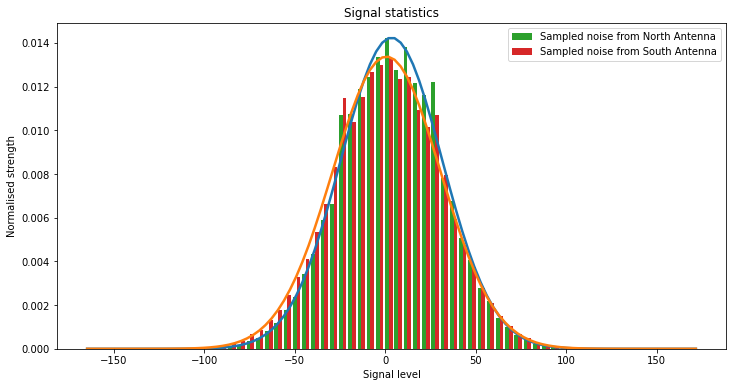

In [4]:
#getting mean and distbn of gaussian values
mean1 = np.mean(volts['AN'])
std1 = np.std(volts['AN'])
mean2 = np.mean(volts['AS'])
std2 = np.std(volts['AS'])
print(mean1, std1, '\t', mean2, std2)

#REMOVE DC AND USE THESE VALUES FOR SUBSEQUENT PLOTTING

#getting a gaussian function from the mean and std
x = np.linspace(mean1-6*std1, mean1+6*std1, 100)
curve1 = np.exp(-(x-mean1)**2/(2*std1**2))/(np.sqrt(2*np.pi)*std1)
curve2 = np.exp(-(x-mean2)**2/(2*std2**2))/(np.sqrt(2*np.pi)*std2)

# Plotting code for voltage distribution
plt.figure(figsize=(12, 6))
plt.plot(x, curve1, x, curve2, linewidth=2.5) #label= ["Gaussian fitting for North antenna data", "Gaussian fitting for South antenna data"])
plt.hist([volts['AN'], volts['AS']], 50, density=True, label= ["Sampled noise from North Antenna", "Sampled noise from South Antenna"])
plt.title("Signal statistics")
plt.xlabel("Signal level")
plt.ylabel("Normalised strength")
plt.legend()
plt.show()

<h3>Section 2: The power time series</h3>

<h4>2.1: Plot the power from North and South antennas as a function of time</h4>

<ul>
  <li>The power is obtained by squaring the voltages (use <a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html" target="_blank">numpy square</a>)</li>
  <li>A simple matplotlib <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">line</a> plot may be sufficient to visualize the time-series.</li>
  <li>Plot a small part of the time series too to zoom in on the variability time-scale</li>
</ul>

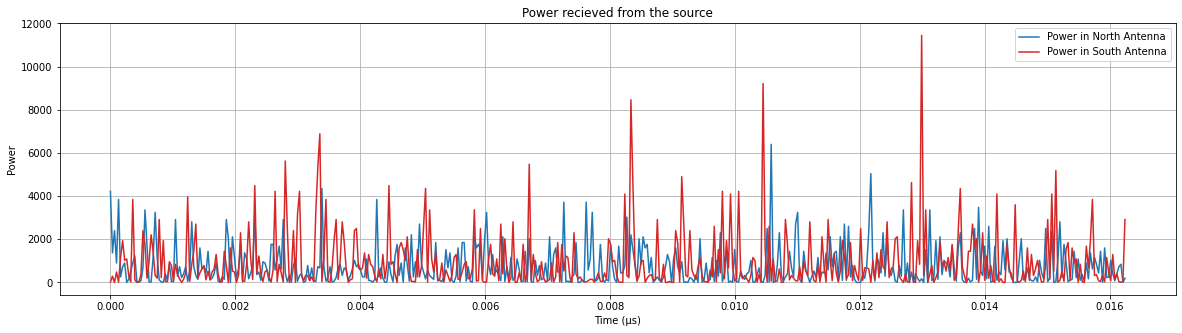

In [5]:
# Plotting code for power time-series
power = np.square(volts)
nsamp = 500
plt.figure(figsize=(20,5))
plt.plot(t[:nsamp], power['AN'][:nsamp], label="Power in North Antenna")
plt.plot(t[:nsamp], power['AS'][:nsamp], 'C3', label="Power in South Antenna")
plt.title("Power recieved from the source")
plt.xlabel("Time (\u03BCs)")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.show()

<h4>2.2: Plot the power histograms for the two antennas</h4> 
<ul>
  <li>Use matplotlib <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist</a> for plotting histograms (<a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_target">Example</a>)</li>
  <li>Plot the appropriate probability distribution function and find it's spread (<a href="https://www.cv.nrao.edu/~sransom/web/A2.html#S6" target="_blank">https://www.cv.nrao.edu/~sransom/web/A2.html#S6</a>)</li>
</ul>

In [6]:
def gaussian(val, mu, sigma):
    return np.exp(-(val-mu)/(2*sigma**2))/(np.sqrt(2*np.pi*val)*sigma)
#getting standard deviation for power spectra, sigma' = sqrt(2)*sigma^2 from voltage distbn
std_p1 = np.sqrt(2)*std1**2
std_p2 = np.sqrt(2)*std2**2
x = np.linspace(0.1, 6*std_p1, 1000)
#print(std_p1, std_p2)
y1 = gaussian(x, 0, std_p1)
y2 = gaussian(x, 0, std_p2)

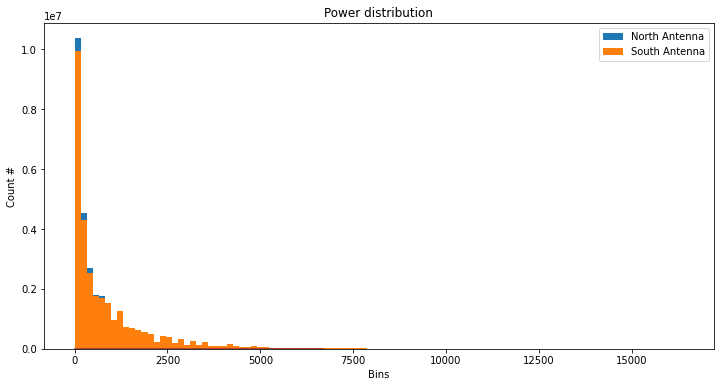

In [7]:
# Plotting code for power distribution
plt.figure(figsize=(12, 6))
plt.hist(power['AN'], 100, label="North Antenna")
plt.hist(power['AS'], 100, label="South Antenna")
plt.plot(x, y1, x, y2, linewidth=2.5)
plt.title("Power distribution")
plt.xlabel("Bins")
plt.ylabel("Count #")
plt.legend()
plt.show()

<h3>Section 3: The Dynamic Spectrum</h3>
<ul>
  <li>Obtain the contribution of various frequencies that produce the voltage time-series &mdash; using a Fast Fourier Transform (FFT)</li>
  <li>A Fourier transform consists of the contributions from the constituent frequency which can be squared to give the power distribution</li>
  <li>Sequences of power spectra can be combined and added to reduce the statistical uncertainties</li>
  <li>A time-ordered series of spectra is referred to as the <em>Dynamic Spectrum</em></li>
</ul>

<h4>3.1: Choose frequency and time binning parameters</h4>
<ul>
  <li>First we want to obtain the spectral composition of the time series. In order to find the spectral information, we select a small part of the time-series, take the Fourier series to convert it to the spectrum in that time range.</li>
  <li>The spectral information is obtained at the cost of time resolution (since FFT of voltage time samples gives the spectrum)</li>
  <li>For time-resolution $dt$, an $N-$point FFT will output the amplitude and phase of $N/2$ frequencies that contains information equivalent to the time-series</li>
  <li>The data can now be transformed to a time series of time bin-size $N\times dt$ but with a $N/2$-bins spectrum in each time bin</li>
  <li>The power spectral distribution is obtained by squaring the Fourier spectrum</li>
</ul>

In [8]:
# Frequency and time binning parameters
Nf = 1024 # Number of frequency bins; Choose a power of 2: 2^n (E.g., 64, 128, 256)
print('Chosen number of frequency bins = {0}'.format(Nf))
fmax = 16.5e6 # Equals the bandwidth upper-limit of 16.5 MHz
print('Total bandwidth of signal = {0:.1f} MHz'.format(fmax/1e6))
dt = 1/33e6 # Time resolution of 1/(33 MHz) seconds
print('Time-resolution of voltage sampling = {0:.2f} nanosecond'.format(dt*1e9))
# For chosen frequency resolution,
print('----------FFT length-----------') # FFT - Fast Fourier Transform
df = fmax/Nf # Lowest frequency probed is equal to the chosen frequency resolution (Bandwidth by number of frequency bins)
print('Lowest frequency probed = {0:.2f} kHz'.format(df/1000))
Tmax =  1/df # Largest time-scale of variability probed is the inverse of the lowest frequency of interest
print('Largest time-scale of variability = {0:.2f} microseconds'.format(Tmax*1e6))
Nfft = int(len(volts)*Tmax)  # Number of voltage samples to obtain FFT is the number of voltage samples that span the largest time-scale of interest
print('Number of voltage samples to obtain FFT = {0:d}'.format(Nfft))
Nspectra =  int(len(volts)/Nfft) # The spectral time series has a factor of 'Nfft' less time bins than the voltage data
print('Number of spectra obtained through the {0}-point FFT = {1}'.format(Nfft, Nspectra))
print('Time-resolution of the spectral series = {0:.2f} microsecond'.format(Nfft*dt*1e6))

Chosen number of frequency bins = 1024
Total bandwidth of signal = 16.5 MHz
Time-resolution of voltage sampling = 30.30 nanosecond
----------FFT length-----------
Lowest frequency probed = 16.11 kHz
Largest time-scale of variability = 62.06 microseconds
Number of voltage samples to obtain FFT = 1906
Number of spectra obtained through the 1906-point FFT = 16117
Time-resolution of the spectral series = 57.76 microsecond


<p>Consecutive spectra can be co-added in batches to reduce the statistical uncertainty in the power values and reduce the spectral array to a manageable size. This comes at the cost of time-resolution.</p>
(Do ensure that the final time-resolution is still at most 1 ms.)

In [9]:
print('----------Time rebinning-----------')
Nint =  5 # Choose the number of consecutive spectral samples to be added
print('Number of spectra to add = {0}'.format(Nint))
print('Time-resolution of the co-added time series = {0} micro-second'.format(Nint*Nfft*dt*1e6))
print("Binned time-series has resolution > 1 ms. Choose a smaller number of spectra to average.") if (Nint*Nfft*dt*1e6 > 1000) else print("Binned time-series has resolution <= 1 ms")

fup = (326.5+8.25)*1e6
fdown = (326.5-8.25)*1e6

----------Time rebinning-----------
Number of spectra to add = 5
Time-resolution of the co-added time series = 288.7878787878788 micro-second
Binned time-series has resolution <= 1 ms


<h4>3.2: Convert voltage time-series to dynamic spectrum (spectral time-series)</h4>
<ul>
  <li>Re-group the voltage time-series into sections of <em>Nfft</em> points each</li>
  <li>Take the Fourier transform of every section of the time-series containting <em>Nfft</em> points</li>
  <li>Convert to power by taking the absolute value square of the complex spectral amplitudes</li>
  <li>Obtain the total power for the <em>Nint</em> spectral samples</li>
</ul>

<p>A simple way of grouping within an array and applying commands to the groups is using numpy method <a href="https://numpy.org/doc/stable/reference/generated/numpy.reshape.html" target="_blank">np.reshape</a> followed by the operation one intends to perform, <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html" target="_blank">np.fft.rfft</a> (for real-valued time-series) in our case.</p> The list of frequencies can be obtained using the <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html" target="_blank">np.fft.rfftfreq</a> method.
<p>Follow-up the FFT with taking the absolute value (<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html" target="_blank">np.abs</a>) of the complex amplitudes and squaring them (<a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html" target="_blank">np.square</a>).</p>

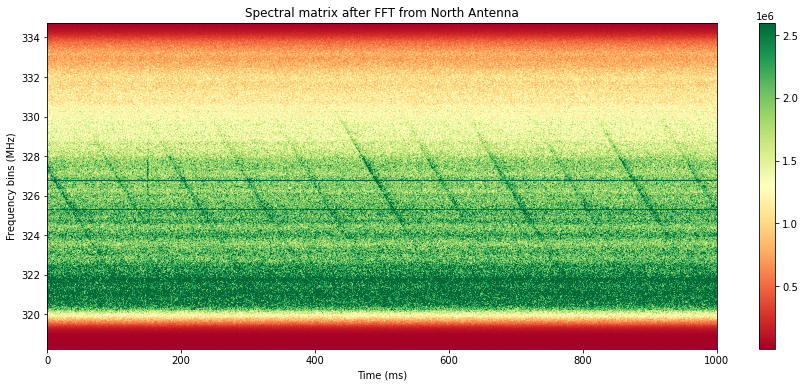

In [10]:
# Code here #
# Reshare the voltage time-series to prepare it for taking the N-point Fourier transform

VN = np.reshape(np.array(volts["AN"][:Nspectra*Nfft]), (Nspectra, Nfft))
VN = VN - mean1
# Obtain the Fourier transform and the frequency list
spectra1 = np.fft.rfft(VN)
freq1 = np.fft.rfftfreq(int(Nfft), d=dt)

# Calculate the absolute value squared for the FFT output to obtain the power spectral density
s1 = np.transpose(np.square(np.abs(spectra1)))

plt.figure(figsize=(15,6))
plt.imshow(s1, aspect='auto', extent=[0, Nspectra*dt*2*Nf*1000, fdown/1e6, fup/1e6], cmap='RdYlGn', vmin=1e3, vmax=2.6e6)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency bins (MHz)')
plt.title("Spectral matrix after FFT from North Antenna")
plt.colorbar()
plt.show()

# Add Nint set of consecutive spectra to obtain the final dynamic spectrum
    
#print(spectra1, '\n', type(spectra1))
#print(Nspectra, Nfft, '\n', freq1, len(freq1), '\n', VN, '\n', spectra1.shape)

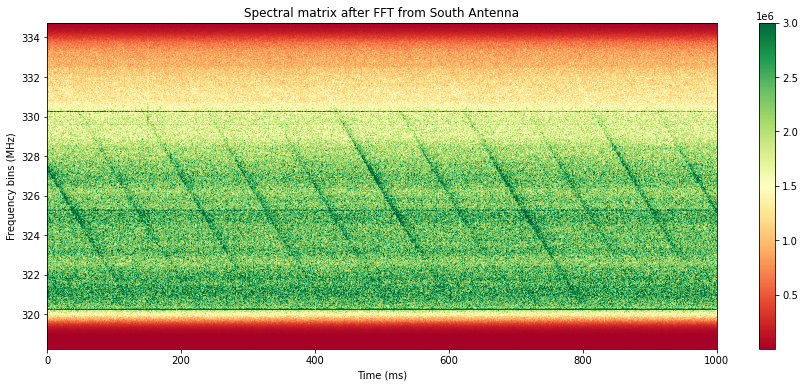

In [11]:
%matplotlib inline
#Same thing doing over South Antenna
VS = np.reshape(np.array(volts["AS"][:(Nspectra)*Nfft]), ((Nspectra), Nfft))
VS = VS - mean2
# Obtain the Fourier transform and the frequency list
spectra2 = np.fft.rfft(VS)

# Calculate the absolute value squared for the FFT output to obtain the power spectral density
s2 = np.transpose(np.square(np.abs(spectra2)))

plt.figure(figsize=(15,6))
plt.imshow(s2, aspect='auto', extent=[0, Nspectra*dt*2*Nf*1000, fdown/1e6, fup/1e6], cmap='RdYlGn', vmin=1e3, vmax=3e6)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency bins (MHz)')
plt.title("Spectral matrix after FFT from South Antenna")
plt.colorbar()


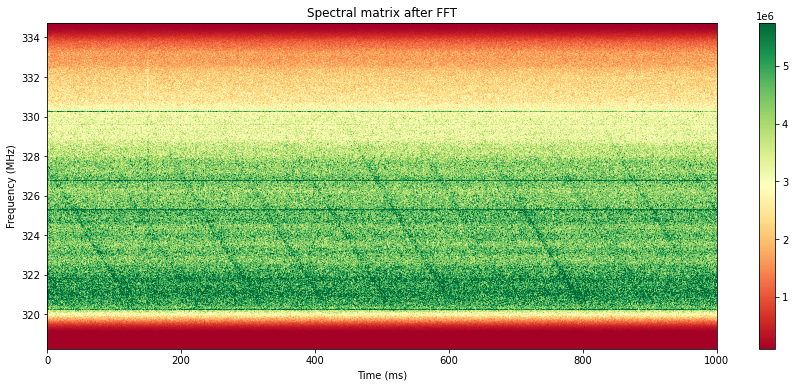

In [12]:
Vsum = VN + VS
spectra_net = np.fft.rfft(Vsum)
snet = np.transpose(np.square(np.abs(spectra_net)))
plt.figure(figsize=(15,6))
plt.imshow(snet, aspect='auto', extent=[0, Nspectra*dt*2*Nf*1000, fdown/1e6, fup/1e6], cmap='RdYlGn', vmin=1e5, vmax=5.75e6)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.title("Spectral matrix after FFT")
plt.colorbar()

In [92]:
print(Nspectra*dt*1000)

0.48839393939393944


<h4>3.3: Plot the dynamic spectrum</h4>
<p>Use either <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html" target="_blank">plt.imshow</a> or <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-pcolormesh-in-python/?ref=lbp" target="_blank">plt.pcolormesh</a> to plot the dynamic spectrum.</p>
<p>Make sure that you label the time and frequency axes appropriately</p>
<p>Caution: <em>imshow</em> and <em>pcolormesh</em> use different locations for the origin in the plot, see <a href="https://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/" target="_blank">this post</a>.

In [ ]:
# Plotting the dynamic spectrum here #




In [32]:
print(s1.shape)


(954, 16117)


<h4>-.-: A consistency check</h4>
<p>The dynamic spectrum will show the presence of any signal above the average noise level along with its frequency dependence and temporal variation.</p>
<p>Often times the spectrum is flipped in the telescope backend and hence the data shows the spectrum in reverse.</p>
<p>In our data, you should be able to see a periodically emitting source with emission over the bulk of the frequency range.<p>
<p>Interstellar dispersion introduces delays at lower-frequencies compared to higher frequencies which should be visible as systematically delayed signal from higher to lower frequencies.</p>
<p>If you see a reversed pattern the spectrum maybe flipped, assuming your plotting of the data is in the correct order. In which case, you will have to flip the spectra along the time series in your dynamic spectrum array.</p>

<h4>3.4: The Power Spectral Density</h4>
<p>The power spectral density of the entire data can be visualized by averaging the spectra over the entire time-series</p>


Text(0.5, 1.0, 'Dynamic Power Spectrum of the Vela Pulsar')

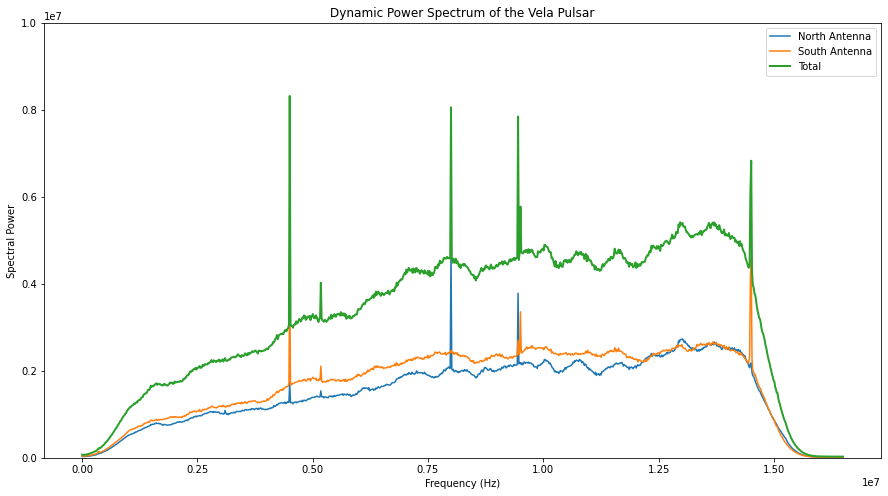

In [13]:
# Use the numpy method 'np.average' on the dynamic spectrum to obtain the average PSD and plot it using the 'plt.line' plotting method.
plt.figure(figsize=(15,8))
total_spectra1 = np.average(s1, axis=1)
total_spectra2 = np.average(s2, axis=1)
total_spectra_net = np.average(snet, axis=1)
f = np.linspace(0, fmax, len(total_spectra1))
plt.plot(f, total_spectra1, label='North Antenna')
plt.plot(f, total_spectra2, label='South Antenna')
plt.plot(f, total_spectra_net, label='Total', linewidth=2)
plt.ylim([0, 1e7])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Power')
plt.title("Dynamic Power Spectrum of the Vela Pulsar")

<u><h2>Source characterization</h2></u>

<h3>General observations from the dynamic spectrum</h3>
<p>The dynamic spectrum provides a good overview of the combined spectral plus temporal behaviour of information in the electrical power received by the Antenna.</p>
<p>What features do you see in the dynamic spectrum?</p>
<ul>
  <li>Is the power distribution uniform in frequency and/or time?</li>
  <li>Any observable periodicities or frequency-dependent delays? Periodic emission ($P\approx \_\_\pm\_$ ms) from a source with systematic delays at  lower frequencies (Time delay $\Delta t\sim\_\_\_$ ms between $\sim\_\_\_-\_\_\_$ MHz range).</li>
  <li>Is the potential source bright in some narrow frequency range?</li>
  <li>Any other observations?</li>
</ul>

<p>We can perform the following analyses on the potential source</p>
<ul>
  <li>De-disperse the signal to compensate for the frequency dependent delays to remove the propagation effects on the signal</li>
  <li>Fold the time-series with the periodicity apparent in the data</li>
  <li>Maximize power concentration in the signal by determining the true period and dispersion correction. The effect of incorrect period and incorrect dispersion correction is always to broaden the power distribution within a period.</li>
</ul>

In [48]:
DM = 68.2

freq_bins = s1.shape[0]
fr = np.linspace(fdown, fup, freq_bins)

#Freq dimensions is Nfft//2 long so create a linspace
td = (4.148e3*DM*((1./328.5**2)- (1./(fr/1e6)**2)))   #time delay in ms

#time-bins 

tshift = (np.rint((td)/(Nfft*dt))).astype(int)   #index corresponding to time delay

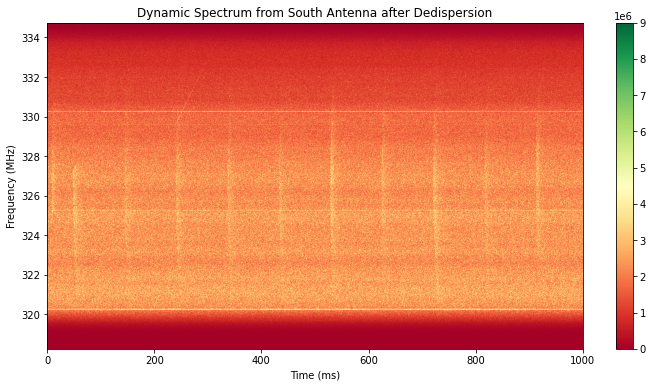

In [49]:
s2_dedisp = np.transpose(np.square(np.abs(spectra2)))

for k, row in enumerate(s2_dedisp):
    s2_dedisp[k, :] = np.roll(s2_dedisp[k, :], -tshift[k])      
    
    
plt.figure(figsize=(12,6))
plt.imshow(s2_dedisp, aspect='auto', extent=[0, Nspectra*dt*2*Nf*1000, fdown/1e6, fup/1e6], cmap='RdYlGn', vmax=9e6)#, vmin=5e5, vmax=1e7)
plt.title('Dynamic Spectrum from South Antenna after Dedispersion')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.colorbar()

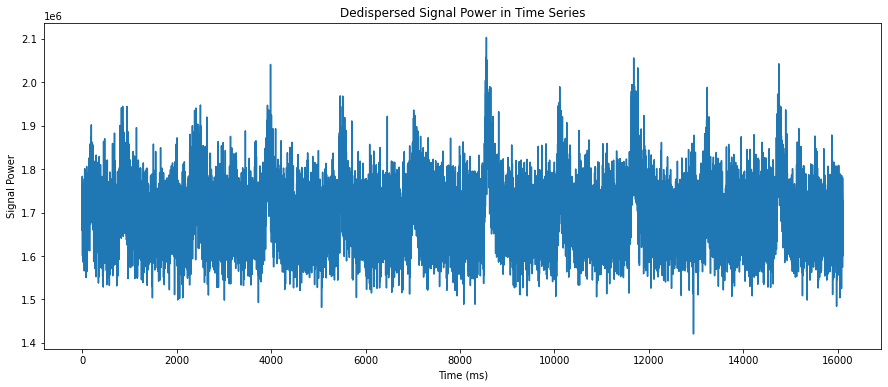

In [50]:
tsp = np.average(s2_dedisp, axis=0)
plt.figure(figsize=(15, 6))
plt.title('Dedispersed Signal Power in Time Series')
plt.xlabel('Time (ms)')
plt.ylabel('Signal Power')
plt.plot(tsp)


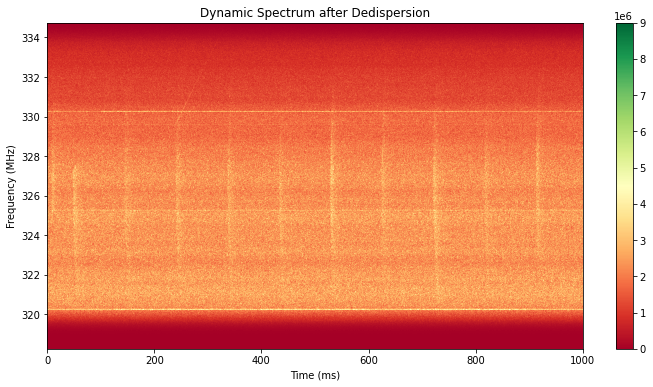

In [51]:
snet_dedisp = np.transpose(np.square(np.abs(spectra_net)))
for k, row in enumerate(snet_dedisp):
    snet_dedisp[k, :] = np.roll(snet_dedisp[k, :], -tshift[k])  
    

plt.figure(figsize=(12,6))
plt.imshow(s2_dedisp, aspect='auto', extent=[0, Nspectra*dt*2*Nf*1000, fdown/1e6, fup/1e6], cmap='RdYlGn', vmax=9e6)#, vmin=5e5, vmax=1e7)
plt.title('Dynamic Spectrum after Dedispersion')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.colorbar()

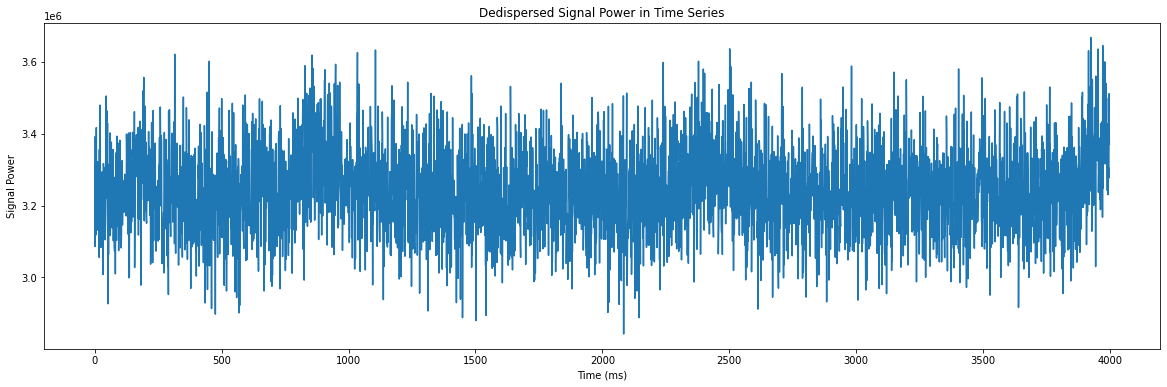

In [52]:
%matplotlib inline
tsp_net = np.average(snet_dedisp, axis=0)
plt.figure(figsize=(20, 6))
plt.title('Dedispersed Signal Power in Time Series')
plt.xlabel('Time (ms)')
plt.ylabel('Signal Power')
plt.plot(tsp_net[1:4000])

1592 10


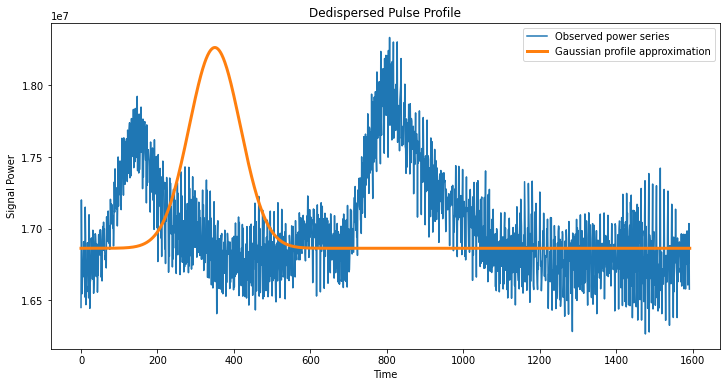

In [61]:
tperiod = 92e-3
fold_size = int(tperiod/(Nfft*dt))
bins = len(tsp)//fold_size
print(fold_size, bins)

pulse_profile = np.zeros(fold_size)


for k in range(fold_size):
    for j in range(bins):
        pulse_profile[k] += tsp[j*bins + k]
    
x = np.linspace(0, len(pulse_profile), len(pulse_profile), len(pulse_profile)*2)
mu = 350
sigma = 67
y= np.exp(-(x-mu)**2/(2*sigma**2))*1.4e6#/(np.sqrt(2*np.pi)*sigma)
plt.figure(figsize=(12, 6))
plt.title('Dedispersed Pulse Profile')
plt.xlabel('Time')
plt.ylabel('Signal Power')
plt.plot(pulse_profile, label='Observed power series')
plt.plot(x, y+np.mean(pulse_profile)-0.015*1e7, label='Gaussian profile approximation', linewidth=3)
plt.legend()

PortAudioError: Error opening OutputStream: Invalid number of channels [PaErrorCode -9998]

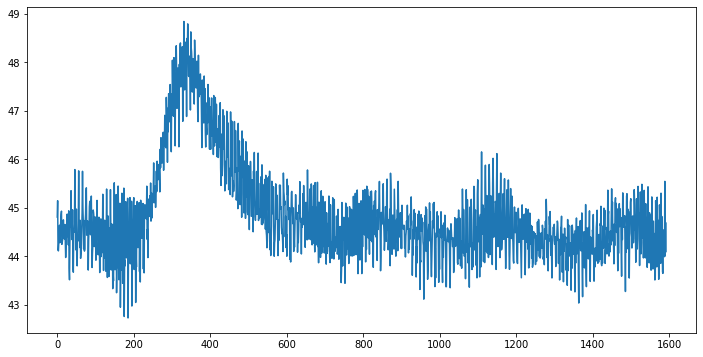

In [115]:
mu = np.mean(pulse_profile)
rms_error = np.sqrt(np.sum(pulse_profile**2-mu**2)/len(pulse_profile))
plt.figure(figsize=(12, 6))
plt.plot(pulse_profile/rms_error)

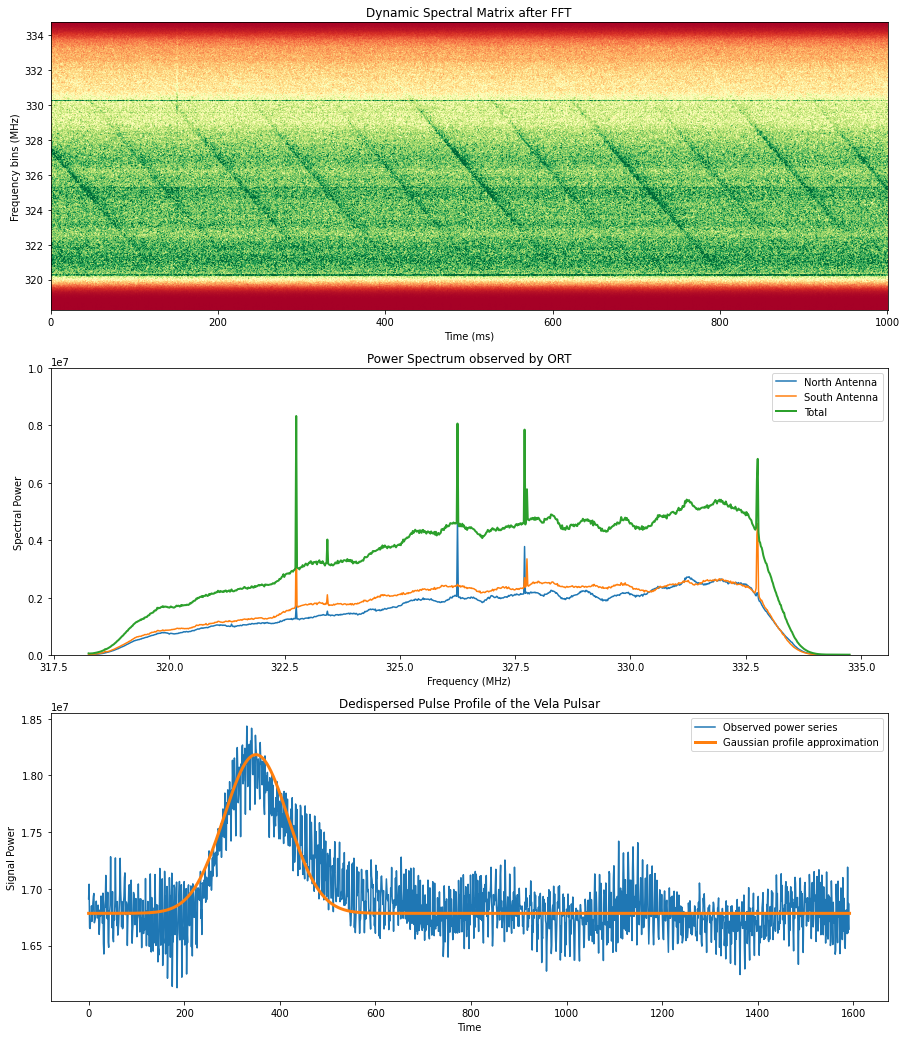

In [128]:
plt.figure(figsize=(15,18))
plt.title("Analysis of the Vela Pulsar from ORT observations")
ax1 = plt.subplot(311)
ax1.imshow(s2, aspect='auto', extent=[0, Nspectra*dt*2*Nf*1000, fdown/1e6, fup/1e6], cmap='RdYlGn', vmin=1e3, vmax=3e6)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Frequency bins (MHz)')
ax1.set_title("Dynamic Spectral Matrix after FFT")


ax2 = plt.subplot(312)
f = np.linspace(fdown/1e6, fup/1e6, len(total_spectra1))
ax2.plot(f, total_spectra1, label='North Antenna')
ax2.plot(f, total_spectra2, label='South Antenna')
ax2.plot(f, total_spectra_net, label='Total', linewidth=2)
ax2.set_ylim([0, 1e7])
ax2.legend()
ax2.set_xlabel('Frequency (MHz)')
ax2.set_ylabel('Spectral Power')
ax2.set_title("Power Spectrum observed by ORT")

ax3 = plt.subplot(313)
ax3.set_title('Dedispersed Pulse Profile of the Vela Pulsar')
ax3.set_xlabel('Time')
ax3.set_ylabel('Signal Power')
ax3.plot(pulse_profile, label='Observed power series')
ax3.plot(x, y+np.mean(pulse_profile)-0.015*1e7, label='Gaussian profile approximation', linewidth=3)
ax3.legend()


plt.savefig('Combined Results.jpg')

Text(0.5, 1.0, 'Sea surface Interferometer')

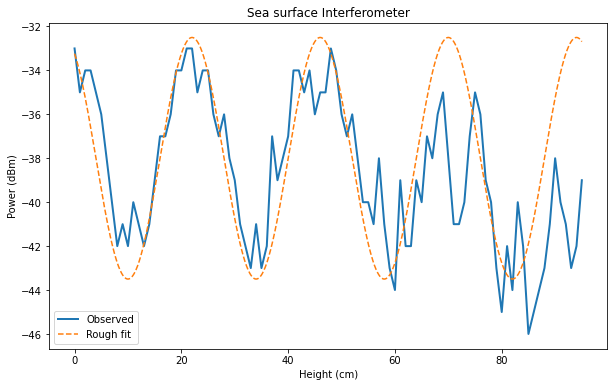

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

data = pd.read_csv('interferometer.csv')
data.head(5)
data['y'] = 100 - data['y']
plt.figure(figsize=(10, 6))
x = np.linspace(min(data['y']), max(data['y']), len(data['y'])*10)
y = -38 + 5.5*np.cos((np.pi*(x+2)/12))
plt.plot(data['y'], data['dBm'], linewidth=2, label='Observed')
plt.plot(x, y, '--', label='Rough fit')
plt.xlabel("Height (cm)")
plt.ylabel("Power (dBm)")
plt.legend()
plt.title("Sea surface Interferometer")

In [ ]:
<a href="" target="_blank"></a>